In [1]:
print("hi")

hi


In [2]:
from config import *
from datasets import FashionDataset, FashionPipeline
from utils import *
from model import *
import torch
import matplotlib.pyplot as plts
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,ConcatDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

ERROR:root:/mnt/d/Playground/Research/Synthesising Virtual Fashion Try-On with Neural Radiance Fields/Results does not exist.
ERROR:root:/mnt/d/Playground/Research/Synthesising Virtual Fashion Try-On with Neural Radiance Fields/Dataset does not exist.


config:  /mnt/d/Playground/Research/Synthesising Virtual Fashion Try-On with Neural Radiance Fields/FashionNeRF


/home/molefe/anaconda3/envs/FashionNeRF/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device(type='cuda')

In [3]:
# argparse 
model_3d = "dennis2"
transform = transforms.ToTensor()
train_dataset = FashionDataset(model=model_3d,data="train")
train_pipeline = FashionPipeline(train_dataset,nC=NUM_SAMPLES,near=near,far=far,rand=True)
train_pipeline_loader = DataLoader(train_pipeline,batch_size=BATCH_SIZE,shuffle=True)

In [4]:
encode_dims,H,W,nC,BATCH_SIZE,num_pos

(16, 100, 100, 12, 5, 120000)

In [5]:
torch.cuda.empty_cache()

In [6]:
image,rays_flat,t_vals = iter(train_pipeline_loader).next()
image.shape,rays_flat.shape,t_vals.shape

(torch.Size([5, 100, 100, 3]),
 torch.Size([5, 120000, 99]),
 torch.Size([5, 100, 100, 12]))

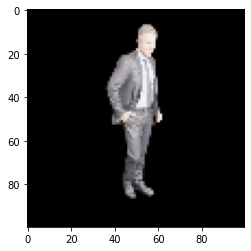

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image[0].detach().numpy())

In [8]:
net = Net(num_layers,num_pos,encode_dims).to(device)

In [9]:
#  tensorboard --logdir=tensorboard 
step = 0
LEARNING_RATE = 2e-4
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr=LEARNING_RATE,betas=(0.5,0.999))
net.train()
do_train = True

In [10]:
torch.cuda.empty_cache()

In [11]:
if do_train:
    for epoch in range(EPOCHS):
        running_loss = 0
        for batch_idx,data in enumerate(train_pipeline_loader):
            image,rays_flat,t_vals = data
            rays_flat = rays_flat.to(device,torch.float32)
            t_vals = t_vals.to(device,torch.float32)
            image = image.to(device)
            rgb,_ = render_rgb_depth(net,rays_flat,t_vals,device,rand=rand,train=True)
            optimizer.zero_grad()
            loss = criterion(image.permute(0,3,1,2),rgb.permute(0,3,1,2))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if batch_idx%20 == 0:
                print(f"[{epoch+1},{batch_idx+1:5d}] loss: {running_loss/85:.5f}")
                with torch.no_grad():
                    rgb, _ = render_rgb_depth(net,rays_flat,t_vals,device,rand=rand,train=True)
                    img_grid_real = torchvision.utils.make_grid(image.permute(0,3,1,2)[:4],normalize=True)
                    img_grid_rgb = torchvision.utils.make_grid(rgb.permute(0,3,1,2)[:4],normalize=True)
                    writer_nerf.add_scalar('training loss',loss,epoch*len(train_pipeline_loader)+batch_idx)
                    writer_real.add_image('Real',img_grid_real,global_step=step)
                    writer_nerf.add_image('Nerf',img_grid_rgb,global_step=step)
                step += 1
    checkpoint = {'state_dict':net.state_dict(),'optimizer':optimizer.state_dict()}    
    save_checkpoint(checkpoint)
    print("Finished traning")

[1,    1] loss: 0.00055
[2,    1] loss: 0.00048
[3,    1] loss: 0.00046
[4,    1] loss: 0.00047
[5,    1] loss: 0.00048
[6,    1] loss: 0.00047
[7,    1] loss: 0.00047
[8,    1] loss: 0.00047
[9,    1] loss: 0.00047
[10,    1] loss: 0.00047
[11,    1] loss: 0.00047
[12,    1] loss: 0.00045
[13,    1] loss: 0.00045
[14,    1] loss: 0.00045
[15,    1] loss: 0.00046
[16,    1] loss: 0.00045
[17,    1] loss: 0.00046
[18,    1] loss: 0.00045
[19,    1] loss: 0.00046
[20,    1] loss: 0.00045
[21,    1] loss: 0.00045
[22,    1] loss: 0.00044
[23,    1] loss: 0.00043
[24,    1] loss: 0.00046
[25,    1] loss: 0.00045
[26,    1] loss: 0.00044
[27,    1] loss: 0.00044
[28,    1] loss: 0.00047
[29,    1] loss: 0.00046
[30,    1] loss: 0.00046
[31,    1] loss: 0.00044
[32,    1] loss: 0.00042
[33,    1] loss: 0.00047
[34,    1] loss: 0.00044
[35,    1] loss: 0.00045
[36,    1] loss: 0.00047
[37,    1] loss: 0.00044
[38,    1] loss: 0.00045
[39,    1] loss: 0.00046
[40,    1] loss: 0.00045
[41,    1